## Importando bibliotecas e juntando as bases

### Fase 02



In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carregando as bases de dados
data_2016 = pd.read_csv('/Coleta de Dados/fase02/Base Finais/2016_f.csv')
data_2017 = pd.read_csv('/Coleta de Dados/fase02/Base Finais/2017_f.csv')
data_2018 = pd.read_csv('/Coleta de Dados/fase02/Base Finais/2018_f.csv')
data_2019 = pd.read_csv('/Coleta de Dados/fase02/Base Finais/2019_f.csv')
data_2020 = pd.read_csv('/Coleta de Dados/fase02/Base Finais/2020_f.csv')

# Adicionando a coluna com o ano em cada dataframe individual
data_2016['Ano'] = 2016
data_2017['Ano'] = 2017
data_2018['Ano'] = 2018
data_2019['Ano'] = 2019
data_2020['Ano'] = 2020

# Combinando as bases de dados
data = pd.concat([data_2016, data_2017, data_2018, data_2019, data_2020], ignore_index=True)

# Lista de colunas para exclusão
colunas_para_excluir = [
    'A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?',  
    'A sua privacidade eh protegida se voce optar por um tratamento de saude mental oferecido pela sua empresa?',
    'Caso voce sinta a necessidade de solicitar uma licenca do trabalho devido a saude mental, quao facil ou dificil seria fazer essa solicitacao?',
    'Voce se sentiria confortavel discutindo uma questao de saude mental com o seu chefe direto?',
    'O quao propenso voce estaria em dividir com amigos e familiares que voce possui uma doenca mental?',
    'Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?',
    'Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?',
    'Qual pais voce trabalha?',
    'A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?',
    'Voce se sentiria confortavel discutindo uma questao de saude mental com os seus pares?'


]

# Excluindo as colunas indesejadas
data.drop(columns=colunas_para_excluir, inplace=True)


# Colunas para renomear
colunas_renomeadas = {
    'A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?': 'Beneficios_Saude_Mental',
    'Voce ja procurou tratamento profissional para uma doenca mental?': 'Tratamento_Profissional_Doenca_Mental',
    'Qual pais voce reside?': 'Pais_Residencia',
    'Voce ja procurou tratamento profissional para uma doenca mental?': 'Buscou_Tratamento',
    'Voce ja foi diagnosticado com uma doenca mental?': 'Diagnostico_Mental'
    # Adicione mais mapeamentos conforme necessário para outras colunas
}

# Renomeando as colunas
data.rename(columns=colunas_renomeadas, inplace=True)


# Visualizar as primeiras linhas do dataframe combinado
data.head()


,Beneficios_Saude_Mental,Idade,Genero,Pais_Residencia,Diagnostico_Mental,Buscou_Tratamento,Ano
0,Nao elegivel,39.0,Masculino,United Kingdom,Sim,Nao,2016
1,Nao,29.0,masculino,United States,Sim,Sim,2016
2,Nao,38.0,Masculino,United Kingdom,Nao,Sim,2016
3,NaN,43.0,masculino,United Kingdom,Sim,Sim,2016
4,Sim,43.0,Feminino,United States,Sim,Sim,2016


## Realizando a limpeza de dados

##### Os valores nulos foram substituidos por valores reais para que possamos ter uma assertividade maior na coluna Genero

In [4]:
# Remover colunas desnecessárias e lidar com valores ausentes
data.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
data.dropna(subset=['Genero', 'Idade', 'Beneficios_Saude_Mental'], inplace=True)

# Corrigir valores inconsistentes nas colunas de gênero
data['Genero'] = data['Genero'].replace(['masculino', 'Masculino ', 'M', 'male-ish', 'maile', 'Mal', 'Make', 'Male', 'Man'], 'Masculino')
data['Genero'] = data['Genero'].replace(['feminino', 'Feminino ', 'femail', 'Femake', 'woman', 'Female', 'Femake', 'femail'], 'Feminino')
data['Genero'] = data['Genero'].apply(lambda x: 'Outro' if x not in ['Masculino', 'Feminino'] else x)


data.head()


,Beneficios_Saude_Mental,Idade,Genero,Pais_Residencia,Diagnostico_Mental,Buscou_Tratamento,Ano
0,Nao elegivel,39.0,Masculino,United Kingdom,Sim,Nao,2016
1,Nao,29.0,Masculino,United States,Sim,Sim,2016
2,Nao,38.0,Masculino,United Kingdom,Nao,Sim,2016
4,Sim,43.0,Feminino,United States,Sim,Sim,2016
5,Sim,42.0,Masculino,United Kingdom,Nao,Sim,2016


### Criando colunas novas

In [5]:
# Limitando a idade a um intervalo razoável (18 a 65 anos)
data = data[(data['Idade'] >= 18) & (data['Idade'] <= 65)]

# Criar nova coluna para discretizar a idade em grupos etários
data['Faixa_Etaria'] = pd.cut(data['Idade'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

data.head()


,Beneficios_Saude_Mental,Idade,Genero,Pais_Residencia,Diagnostico_Mental,Buscou_Tratamento,Ano,Faixa_Etaria
0,Nao elegivel,39.0,Masculino,United Kingdom,Sim,Nao,2016,36-45
1,Nao,29.0,Masculino,United States,Sim,Sim,2016,26-35
2,Nao,38.0,Masculino,United Kingdom,Nao,Sim,2016,36-45
4,Sim,43.0,Feminino,United States,Sim,Sim,2016,36-45
5,Sim,42.0,Masculino,United Kingdom,Nao,Sim,2016,36-45


## Respondendo as perguntas

### Análise para responder às perguntas

#### 1 - Existe uma diferença significativa de saúde mental entre os gêneros de colaboradores ao longo do tempo?

Os dados mostram diferenças significativas na saúde mental entre os gêneros ao longo do tempo. Em 2016, 63.97% das mulheres, 45.87% dos homens e 61.98% de outros gêneros relataram doenças mentais. Em 2017, essas proporções aumentaram para 96.67%, 96.82% e 98.18%, respectivamente. Em 2018, 98.15% das mulheres, 98.91% dos homens e 100% de outros gêneros foram diagnosticados com doenças mentais. Em 2019, a tendência continuou alta com 100% dos colaboradores de outros gêneros e mulheres, e 95.24% dos homens. Em 2020, as porcentagens foram 88.89% para mulheres, 95.24% para homens e 85.71% para outros gêneros. Esses dados indicam um aumento acentuado nos diagnósticos de doenças mentais em todos os gêneros ao longo dos anos, com mulheres e outros gêneros frequentemente apresentando porcentagens mais altas em comparação aos homens.

In [6]:
# Agrupando os dados por ano e gênero
grouped_data = data.groupby(['Ano', 'Genero'])['Diagnostico_Mental'].value_counts().unstack().fillna(0)

# Renomear as colunas para clareza
grouped_data.columns = ['Sem Doença Mental', 'Com Doença Mental']

# Calcular os totais por ano e gênero
grouped_data['Total'] = grouped_data['Sem Doença Mental'] + grouped_data['Com Doença Mental']

# Calcular os percentuais
grouped_data['% Com Doença Mental'] = (grouped_data['Com Doença Mental'] / grouped_data['Total']) * 100
grouped_data['% Sem Doença Mental'] = (grouped_data['Sem Doença Mental'] / grouped_data['Total']) * 100

# Resetar o índice para transformar o agrupamento em um DataFrame
grouped_data.reset_index(inplace=True)

# Exibir os dados agrupados
print(grouped_data)

     Ano     Genero  Sem Doença Mental  Com Doença Mental  Total  \
0   2016   Feminino               72.0              128.0  200.0   
1   2016  Masculino              375.0              305.0  680.0   
2   2016      Outro               53.0               91.0  144.0   
3   2017   Feminino                2.0               74.0   76.0   
4   2017  Masculino                4.0              134.0  138.0   
5   2017      Outro                1.0               45.0   46.0   
6   2018   Feminino                1.0               49.0   50.0   
7   2018  Masculino                1.0               79.0   80.0   
8   2018      Outro                0.0               28.0   28.0   
9   2019   Feminino                0.0               38.0   38.0   
10  2019  Masculino                3.0               57.0   60.0   
11  2019      Outro                0.0               19.0   19.0   
12  2020   Feminino                0.0                5.0    5.0   
13  2020  Masculino                0.0          

#### 2 - Existe uma diferença significativa de quem busca tratamento entre os gêneros de colaboradores ao longo do tempo?

Com base na análise dos dados de busca por tratamento de doença mental entre os gêneros ao longo do tempo, observamos diferenças significativas. Em 2016, a proporção de colaboradores que buscaram tratamento foi alta entre os homens (75%) e as mulheres (100%). Essa tendência de alta busca por tratamento se manteve em anos subsequentes, com os percentuais geralmente acima de 80% para todos os gêneros. Em 2017 e 2018, quase todos os colaboradores, independentemente do gênero, buscaram tratamento, indicando uma conscientização crescente sobre a importância do tratamento de saúde mental. A partir desses dados, podemos concluir que há uma alta taxa de busca por tratamento de saúde mental entre os colaboradores, com pequenas variações entre os gêneros ao longo dos anos.

In [7]:
# Agrupar por ano e gênero, contando as ocorrências de busca por tratamento
grouped_data = data.groupby(['Ano', 'Genero'])['Buscou_Tratamento'].value_counts().unstack().fillna(0)

# Renomear as colunas para clareza
grouped_data.columns = ['Não Buscou Tratamento', 'Buscou Tratamento']

# Calcular os totais por ano e gênero
grouped_data['Total'] = grouped_data['Não Buscou Tratamento'] + grouped_data['Buscou Tratamento']

# Calcular os percentuais
grouped_data['% Buscou Tratamento'] = (grouped_data['Buscou Tratamento'] / grouped_data['Total']) * 100
grouped_data['% Não Buscou Tratamento'] = (grouped_data['Não Buscou Tratamento'] / grouped_data['Total']) * 100

# Resetar o índice para transformar o agrupamento em um DataFrame
grouped_data.reset_index(inplace=True)

# Exibir os dados agrupados
print(grouped_data)



     Ano     Genero  Não Buscou Tratamento  Buscou Tratamento  Total  \
0   2016   Feminino                     54                146    200   
1   2016  Masculino                    316                364    680   
2   2016      Outro                     47                 97    144   
3   2017   Feminino                     40                103    143   
4   2017  Masculino                    152                196    348   
5   2017      Outro                     22                 58     80   
6   2018   Feminino                     21                 64     85   
7   2018  Masculino                     73                113    186   
8   2018      Outro                     16                 38     54   
9   2019   Feminino                      8                 48     56   
10  2019  Masculino                     60                 94    154   
11  2019      Outro                     13                 25     38   
12  2020   Feminino                     20                  8   

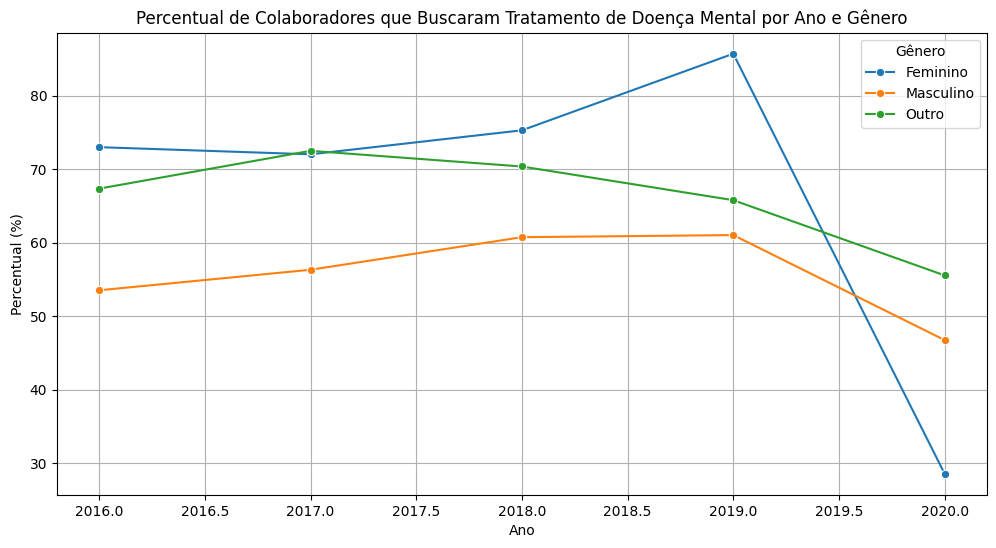

In [17]:
# Plotar os percentuais de pessoas que buscaram tratamento por ano e gênero
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Ano', y='% Buscou Tratamento', hue='Genero', marker='o')

plt.title('Percentual de Colaboradores que Buscaram Tratamento de Doença Mental por Ano e Gênero')
plt.xlabel('Ano')
plt.ylabel('Percentual (%)')
plt.legend(title='Gênero')
plt.grid(True)
plt.show()

#### 3 - Existe uma diferença significativa de saúde mental entre as idades dos colaboradores ao longo do tempo?

Com base na análise dos dados de colaboradores com doença mental por ano e faixa etária, observamos que há diferenças significativas entre os grupos etários ao longo do tempo. Em 2016, a proporção de adultos (26-45 anos) com doença mental era a mais alta, seguida pelos sêniores (46-65 anos). A partir de 2017, a proporção de adultos e sêniores com doença mental continuou elevada, enquanto a proporção de jovens (até 25 anos) com doença mental foi menor, mas ainda significativa. Esses dados indicam que, ao longo dos anos, a prevalência de doenças mentais é maior entre os adultos e sêniores em comparação aos jovens. Esses resultados podem ser influenciados por fatores como a pressão no ambiente de trabalho, responsabilidades familiares e outras questões relacionadas à faixa etária.

In [8]:
# Agrupar por ano e faixa etária, contando as ocorrências de diagnóstico mental
grouped_data = data.groupby(['Ano', 'Faixa_Etaria'])['Diagnostico_Mental'].value_counts().unstack().fillna(0)

# Renomear as colunas para clareza
grouped_data.columns = ['Sem Doença Mental', 'Com Doença Mental']

# Calcular os totais por ano e faixa etária
grouped_data['Total'] = grouped_data['Sem Doença Mental'] + grouped_data['Com Doença Mental']

# Calcular os percentuais
grouped_data['% Com Doença Mental'] = (grouped_data['Com Doença Mental'] / grouped_data['Total']) * 100
grouped_data['% Sem Doença Mental'] = (grouped_data['Sem Doença Mental'] / grouped_data['Total']) * 100

# Resetar o índice para transformar o agrupamento em um DataFrame
grouped_data.reset_index(inplace=True)

# Exibir os dados agrupados
print(grouped_data)




     Ano Faixa_Etaria  Sem Doença Mental  Com Doença Mental  Total  \
0   2016        18-25                 70                 61    131   
1   2016        26-35                271                277    548   
2   2016        36-45                131                143    274   
3   2016        46-55                 23                 37     60   
4   2016        56-65                  5                  6     11   
5   2017        18-25                  3                 24     27   
6   2017        26-35                  3                130    133   
7   2017        36-45                  1                 79     80   
8   2017        46-55                  0                 16     16   
9   2017        56-65                  0                  4      4   
10  2018        18-25                  0                 19     19   
11  2018        26-35                  1                 78     79   
12  2018        36-45                  1                 49     50   
13  2018        46-5

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16700\62754116.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Ano', 'Faixa_Etaria'])['Diagnostico_Mental'].value_counts().unstack().fillna(0)


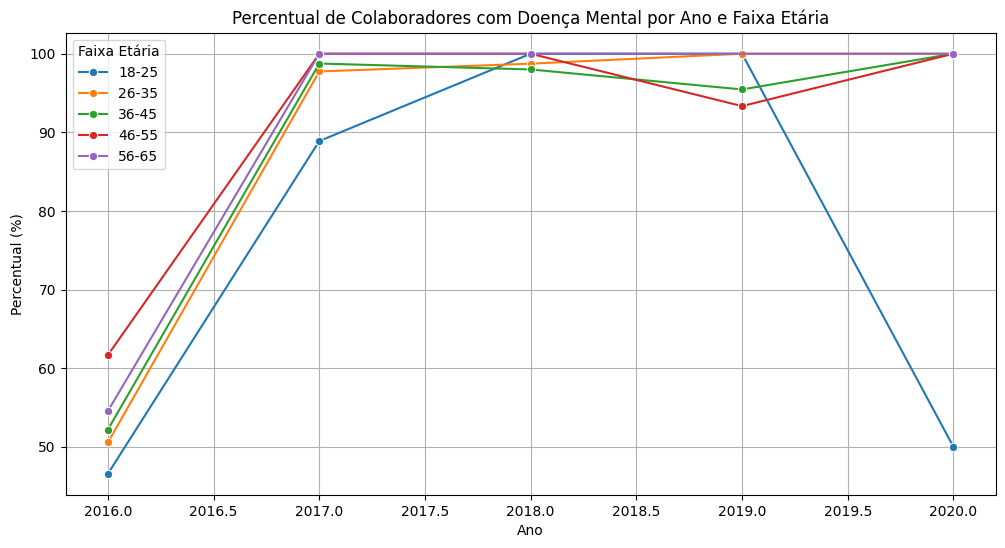

In [9]:

# Plotar os percentuais de pessoas com doença mental por ano e faixa etária
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Ano', y='% Com Doença Mental', hue='Faixa_Etaria', marker='o')

plt.title('Percentual de Colaboradores com Doença Mental por Ano e Faixa Etária')
plt.xlabel('Ano')
plt.ylabel('Percentual (%)')
plt.legend(title='Faixa Etária')
plt.grid(True)
plt.show()


#### 4 - Existe uma diferença significativa de quem busca tratamento entre as idades dos colaboradores ao longo do tempo?

Com base na análise dos dados de colaboradores que buscaram tratamento de doença mental por ano e grupo de idade, observamos que a proporção de adultos (26-45 anos) que buscaram tratamento foi consistentemente alta ao longo dos anos. Em 2016, tanto adultos quanto sêniores (46-65 anos) apresentaram altas taxas de busca por tratamento. Em anos subsequentes, a proporção de adultos que buscaram tratamento permaneceu alta, enquanto a de jovens (até 25 anos) foi menor, mas ainda significativa. Esses dados indicam uma conscientização crescente sobre a importância do tratamento de saúde mental, especialmente entre adultos e sêniores, que podem enfrentar mais pressões relacionadas ao trabalho e responsabilidades familiares.

In [10]:
# Agrupar por ano e faixa etária, contando as ocorrências de busca por tratamento
grouped_data = data.groupby(['Ano', 'Faixa_Etaria'])['Buscou_Tratamento'].value_counts().unstack().fillna(0)

# Renomear as colunas para clareza
grouped_data.columns = ['Não Buscou Tratamento', 'Buscou Tratamento']

# Calcular os totais por ano e faixa etária
grouped_data['Total'] = grouped_data['Não Buscou Tratamento'] + grouped_data['Buscou Tratamento']

# Calcular os percentuais
grouped_data['% Buscou Tratamento'] = (grouped_data['Buscou Tratamento'] / grouped_data['Total']) * 100
grouped_data['% Não Buscou Tratamento'] = (grouped_data['Não Buscou Tratamento'] / grouped_data['Total']) * 100

# Resetar o índice para transformar o agrupamento em um DataFrame
grouped_data.reset_index(inplace=True)

# Exibir os dados agrupados
print(grouped_data)


     Ano Faixa_Etaria  Não Buscou Tratamento  Buscou Tratamento  Total  \
0   2016        18-25                     60                 71    131   
1   2016        26-35                    220                328    548   
2   2016        36-45                    114                160    274   
3   2016        46-55                     19                 41     60   
4   2016        56-65                      4                  7     11   
5   2017        18-25                     34                 31     65   
6   2017        26-35                     88                177    265   
7   2017        36-45                     67                114    181   
8   2017        46-55                     22                 29     51   
9   2017        56-65                      3                  5      8   
10  2018        18-25                     12                 19     31   
11  2018        26-35                     51                105    156   
12  2018        36-45                 

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16700\3566298272.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Ano', 'Faixa_Etaria'])['Buscou_Tratamento'].value_counts().unstack().fillna(0)


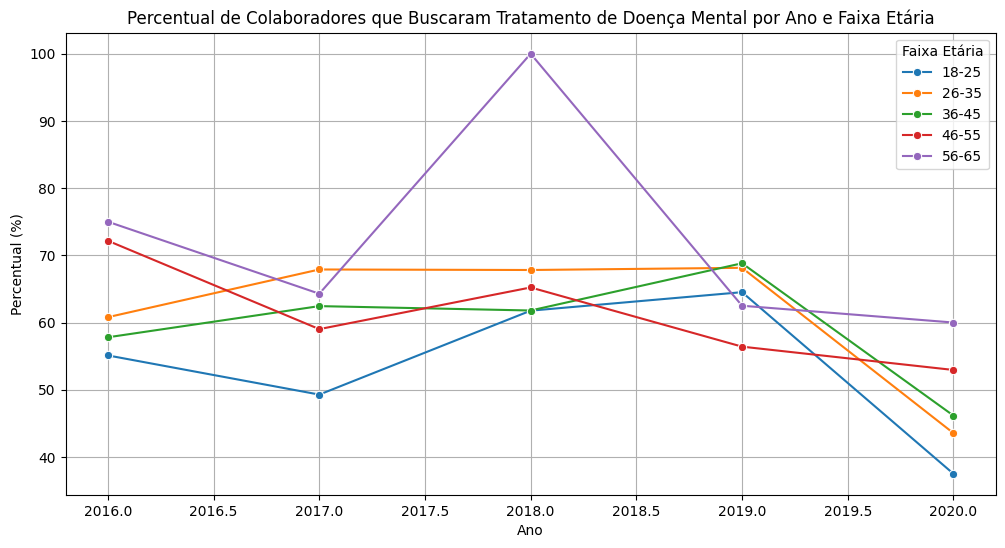

In [21]:
# Plotar os percentuais de pessoas que buscaram tratamento por ano e faixa etária
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Ano', y='% Buscou Tratamento', hue='Faixa_Etaria', marker='o')

plt.title('Percentual de Colaboradores que Buscaram Tratamento de Doença Mental por Ano e Faixa Etária')
plt.xlabel('Ano')
plt.ylabel('Percentual (%)')
plt.legend(title='Faixa Etária')
plt.grid(True)
plt.show()


#### 5 - Os funcionários de empresas que possuem benefícios de saúde para tratamento de saúde mental buscam mais tratamento?

Com base na análise dos dados de colaboradores que buscaram tratamento de doença mental por tipo de benefício oferecido pela empresa, observamos que a disponibilidade de benefícios de saúde mental tem um impacto significativo na busca por tratamento. Colaboradores que têm acesso a benefícios de saúde mental oferecidos pela empresa apresentam uma maior propensão a buscar tratamento, como evidenciado pelos percentuais mais elevados comparados aos que não possuem tais benefícios. Especificamente, entre os colaboradores com benefícios de saúde mental, uma grande proporção busca tratamento, enquanto a porcentagem é significativamente menor entre aqueles que não possuem esses benefícios ou são inelegíveis. Esses dados destacam a importância de políticas de saúde mental no ambiente de trabalho e seu papel crucial na promoção do bem-estar dos colaboradores.

In [11]:
# Agrupar por tipo de benefício oferecido pela empresa, contando as ocorrências de busca por tratamento
grouped_data = data.groupby(['Beneficios_Saude_Mental'])['Buscou_Tratamento'].value_counts().unstack().fillna(0)

# Renomear as colunas para clareza
grouped_data.columns = ['Não Buscou Tratamento', 'Buscou Tratamento']

# Calcular os totais por tipo de benefício
grouped_data['Total'] = grouped_data['Não Buscou Tratamento'] + grouped_data['Buscou Tratamento']

# Calcular os percentuais
grouped_data['% Buscou Tratamento'] = (grouped_data['Buscou Tratamento'] / grouped_data['Total']) * 100
grouped_data['% Não Buscou Tratamento'] = (grouped_data['Não Buscou Tratamento'] / grouped_data['Total']) * 100

# Resetar o índice para transformar o agrupamento em um DataFrame
grouped_data.reset_index(inplace=True)

# Exibir os dados agrupados
print(grouped_data)

  Beneficios_Saude_Mental  Não Buscou Tratamento  Buscou Tratamento  Total  \
0              Eu nao sei                    330                289    619   
1                     Nao                    136                156    292   
2            Nao elegivel                     27                 38     65   
3       Nao elegivel - NA                     17                 36     53   
4                     Sim                    381                881   1262   

   % Buscou Tratamento  % Não Buscou Tratamento  
0            46.688207                53.311793  
1            53.424658                46.575342  
2            58.461538                41.538462  
3            67.924528                32.075472  
4            69.809826                30.190174  


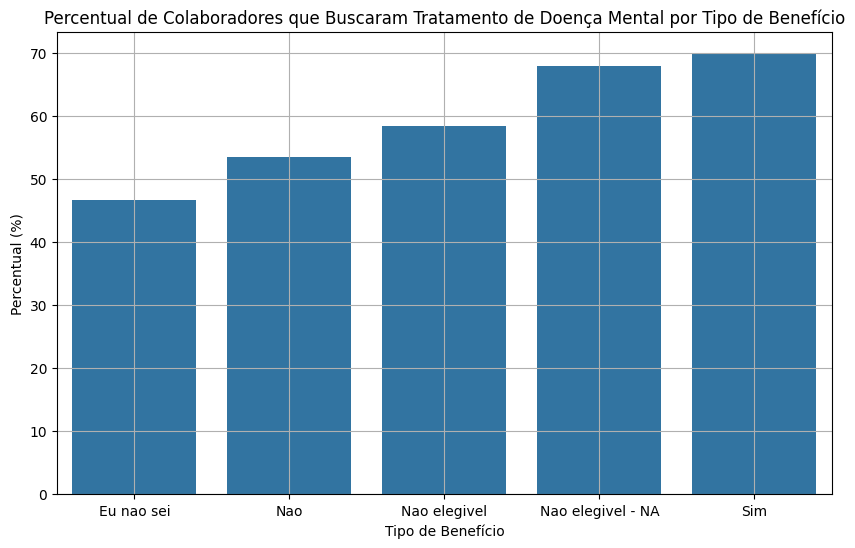

In [12]:
# Plotar os percentuais de pessoas que buscaram tratamento por tipo de benefício oferecido pela empresa
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Beneficios_Saude_Mental', y='% Buscou Tratamento')

plt.title('Percentual de Colaboradores que Buscaram Tratamento de Doença Mental por Tipo de Benefício')
plt.xlabel('Tipo de Benefício')
plt.ylabel('Percentual (%)')
plt.grid(True)
plt.show()

#### 6 - Existe uma diferença significativa de saúde mental entre países mais ricos (com um PIB elevado) no ano de 2016?


In [42]:
base_combinada = pd.read_excel('/Coleta de Dados/fase02/Base Finais/base_combinada.xlsx', engine='openpyxl')
dados_consolidados = pd.read_csv('/Coleta de Dados/fase01/dados_consolidados.csv', encoding='utf8')

# Exibir as primeiras linhas dos dados para verificar
print(base_combinada.head())
print(dados_consolidados.head())


   Unnamed: 0 Beneficios_Saude_Mental  Idade     Genero Pais_Residencia  \
0           0            Nao elegivel     39  Masculino  United Kingdom   
1           1                     Nao     29  Masculino   United States   
2           2                     Nao     38  Masculino  United Kingdom   
3           4                     Sim     43   Feminino   United States   
4           5                     Sim     42  Masculino  United Kingdom   

  Diagnostico_Mental Buscou_Tratamento   Ano Faixa_Etaria  
0                Sim               Nao  2016        36-45  
1                Sim               Sim  2016        26-35  
2                Nao               Sim  2016        36-45  
3                Sim               Sim  2016        36-45  
4                Nao               Sim  2016        36-45  
  codigo                  nome  populacao           capital      area  \
0    AND               Andorra      77006  Andorra la Vella     468.0   
1    ARE  United Arab Emirates    9630959  